# LAB 1 - REGRESSION

## Gradient Descent for Single Variable Regression

The model function for linear regression, which is a function that maps from `x` to `y` is represented as:
    $$f_{w,b}(x) = wx + b$$
    
* To train a *linear regression* model, we want to find the best $(w,b)$ parameters that fit our dataset.
* The choice of $(w,b)$ that fits our data the best is the one that has the smallest cost $J(w,b)$.


To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, we can use **gradient descent**. With each step of gradient descent, parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.

**Cost function:**

The cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$
  
* $ f_{w,b}(x^{(i)}) = wx^{(i)} + b$: prediction of `y`.
* $y^{(i)}$: actual `y` data that is recorded in the data.
* $m$: the number of training examples in the dataset.
* $cost^{(i)} =  (f_{w,b}(x^{(i)}) - y^{(i)})^2$: cost.
* $J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$: total cost.

Ref:  https://aunnnn.github.io/ml-tutorial/html/index.html#

Iteration 0: Cost = 1028.9745, w = 2.2691, b = 0.1652
Iteration 100: Cost = 6.9422, w = 3.5975, b = 2.8642
Iteration 200: Cost = 4.6208, w = 3.3741, b = 4.3501
Iteration 300: Cost = 3.7627, w = 3.2382, b = 5.2534
Iteration 400: Cost = 3.4456, w = 3.1557, b = 5.8026
Iteration 500: Cost = 3.3284, w = 3.1054, b = 6.1365
Iteration 600: Cost = 3.2850, w = 3.0749, b = 6.3396
Iteration 700: Cost = 3.2690, w = 3.0564, b = 6.4630
Iteration 800: Cost = 3.2631, w = 3.0451, b = 6.5380
Iteration 900: Cost = 3.2609, w = 3.0382, b = 6.5836
Cost = 3.2601, Final parameters: w = 3.0341, b = 6.6111


Text(0.5, 0, 'x')

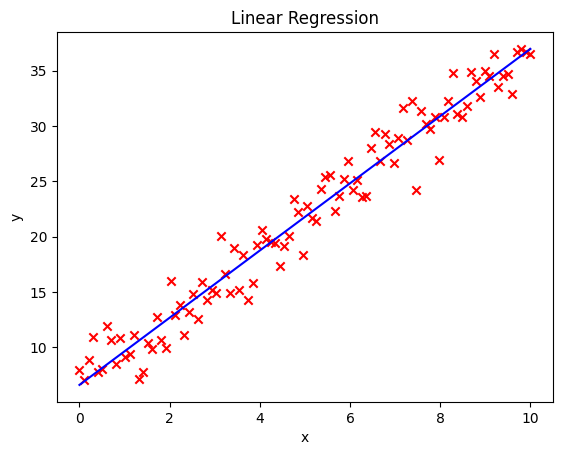

In [ ]:
# GRADIENT DESCENT - SIMPLE EXAMPLE

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 3 * x + 7 + np.random.randn(100) * 2  # y = 3x + 7 + noise

# Initialize parameters
w = np.random.randn()
b = np.random.randn()

# Hyperparameters
learning_rate = 0.01
iterations = 1000

# Gradient Descent
cost_history = []
w_history = []
b_history = []
for i in range(iterations):
    y_pred = w * x + b
    error = y_pred - y
    cost = np.mean(error ** 2)  # Mean Squared Error
    cost_history.append(cost)
    w_history.append(w)
    b_history.append(b)

    # Compute gradients
    dw = (2 / len(x)) * np.sum(error * x)
    db = (2 / len(x)) * np.sum(error)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Print status every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

# Final parameter values
print(f"Cost = {cost:.4f}, Final parameters: w = {w:.4f}, b = {b:.4f}")

# Plot cost function in 3D
w_values = np.linspace(w - 2, w + 2, 50)
b_values = np.linspace(b - 2, b + 2, 50)
J_values = np.zeros((50, 50))

for i in range(50):
    for j in range(50):
        w_temp = w_values[i]
        b_temp = b_values[j]
        y_pred_temp = w_temp * x + b_temp
        J_values[i, j] = np.mean((y_pred_temp - y) ** 2)

m = x.shape[0]
predicted_x = np.zeros(m)

# Linear Regression
for i in range(m):
    predicted_x[i] = w * x[i] + b

# Plot the linear fit
plt.plot(x, predicted_x, c = "b")
# Create a scatter plot of the data.
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Linear Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')


**w/ SKLEARN**

Final parameters: w = 3.0276, b = 6.6544


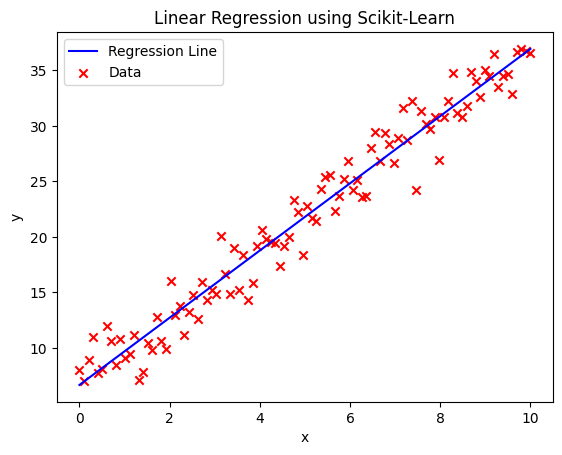

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100).reshape(-1, 1)  # Reshape for sklearn
y = 3 * x + 7 + np.random.randn(100, 1) * 2  # y = 3x + 7 + noise

# Train a Linear Regression model
model = LinearRegression()
model.fit(x, y)

# Get model parameters (take scalar)
w = model.coef_[0][0] # Slope
b = model.intercept_[0] # Intercept

print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")

# Make predictions
y_pred = model.predict(x)

# Plot the linear fit
plt.plot(x, y_pred, c="b", label="Regression Line")
# Create a scatter plot of the data
plt.scatter(x, y, marker='x', c='r', label="Data")
# Set the title
plt.title("Linear Regression using Scikit-Learn")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')
plt.legend()
plt.show()

**Calculation of R2 score:**

he coefficient of determination, denoted as \( R^2 \), measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It is defined as:

\begin{equation}
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
\end{equation}

where:

$ SS_{\text{res}}$ (Residual Sum of Squares):
\begin{equation}
SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

$ SS_{\text{tot}} $ (Total Sum of Squares):
\begin{equation}
SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2
\end{equation}


Here:
* $y_i$ represents the actual values.
* $\hat{y}_i$ represents the predicted values.
* $\bar{y}$  is the mean of actual values ($\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$).


Interpretation of \( R^2 \):

* $R^2 = 1$: Perfect fit (model explains all variance).
* $0.7 \leq R^2 < 1 $: Good model fit.
* $R^2 = 0$: Model is no better than predicting the mean.
* $R^2 < 0$: Model performs worse than just using the mean.


In [ ]:
# Compute R² Score using Scikit-Learn
r2 = r2_score(y, y_pred)
print(f"R² Score (Scikit-Learn): {r2:.4f}")

R² Score (Scikit-Learn): 0.9599


## Gradient Descent for Multivariable Regression

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w}}(\mathbf{x}) =  w_0 + w_1x_1 +... + w_{n-1}x_{n-1} $$

or in vector notation:

$$  f_{\mathbf{w}}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} $$  

where $\cdot$ is a vector `dot product`

The equation for the cost function with multiple variables $J(\mathbf{w})$ is:

$$J(\mathbf{w}) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$

where:
$$ f_{\mathbf{w}}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}  $$


$\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

**Gradient descent for multiple variables:**

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w})}{\partial w_j} & \text{for } j = 0, 1, \ldots, n \newline  \rbrace
\end{align*}$$

where, $n$ is the number of features and parameters $w_j$ are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w})}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  & \text{for } j = 0, 1, \ldots, n \newline
\end{align}
$$
* m is the number of training examples in the data set

or in vector notation:

$$ \nabla J(\mathbf{w}) = \frac{1}{m} \mathbf{x}^T (\mathbf{w} \cdot \mathbf{x} - \mathbf{y}) $$

**Check:**

1. https://mrandri19.github.io/2019/04/01/deriving-gradient-descent-multivariate-linear-regression.html
2. https://medium.com/@IwriteDSblog/gradient-descent-for-multivariable-regression-in-python-d430eb5d2cd8

 Initial w = [0.698 0.536 0.31  0.814 0.685] 

Iteration 1000: Cost = 0.6998, w = [0.577 0.471 0.244 0.746 0.621]
Iteration 2000: Cost = 0.4870, w = [0.478 0.417 0.191 0.691 0.569]
Iteration 3000: Cost = 0.3450, w = [0.398 0.373 0.148 0.645 0.526]
Iteration 4000: Cost = 0.2504, w = [0.334 0.337 0.112 0.607 0.491]
Iteration 5000: Cost = 0.1872, w = [0.281 0.307 0.082 0.576 0.463]
Iteration 6000: Cost = 0.1451, w = [0.239 0.283 0.058 0.55  0.439]
Iteration 7000: Cost = 0.1169, w = [0.204 0.263 0.039 0.528 0.42 ]
Iteration 8000: Cost = 0.0981, w = [0.177 0.247 0.022 0.51  0.404]
Iteration 9000: Cost = 0.0855, w = [0.155 0.233 0.009 0.495 0.391]
Iteration 10000: Cost = 0.0771, w = [ 0.137  0.222 -0.002  0.482  0.381]
Iteration 11000: Cost = 0.0714, w = [ 0.123  0.212 -0.011  0.471  0.372]
Iteration 12000: Cost = 0.0676, w = [ 0.112  0.204 -0.019  0.461  0.365]
Iteration 13000: Cost = 0.0650, w = [ 0.104  0.198 -0.025  0.453  0.359]
Iteration 14000: Cost = 0.0632, w = [ 0.097  0.192 -0.031 

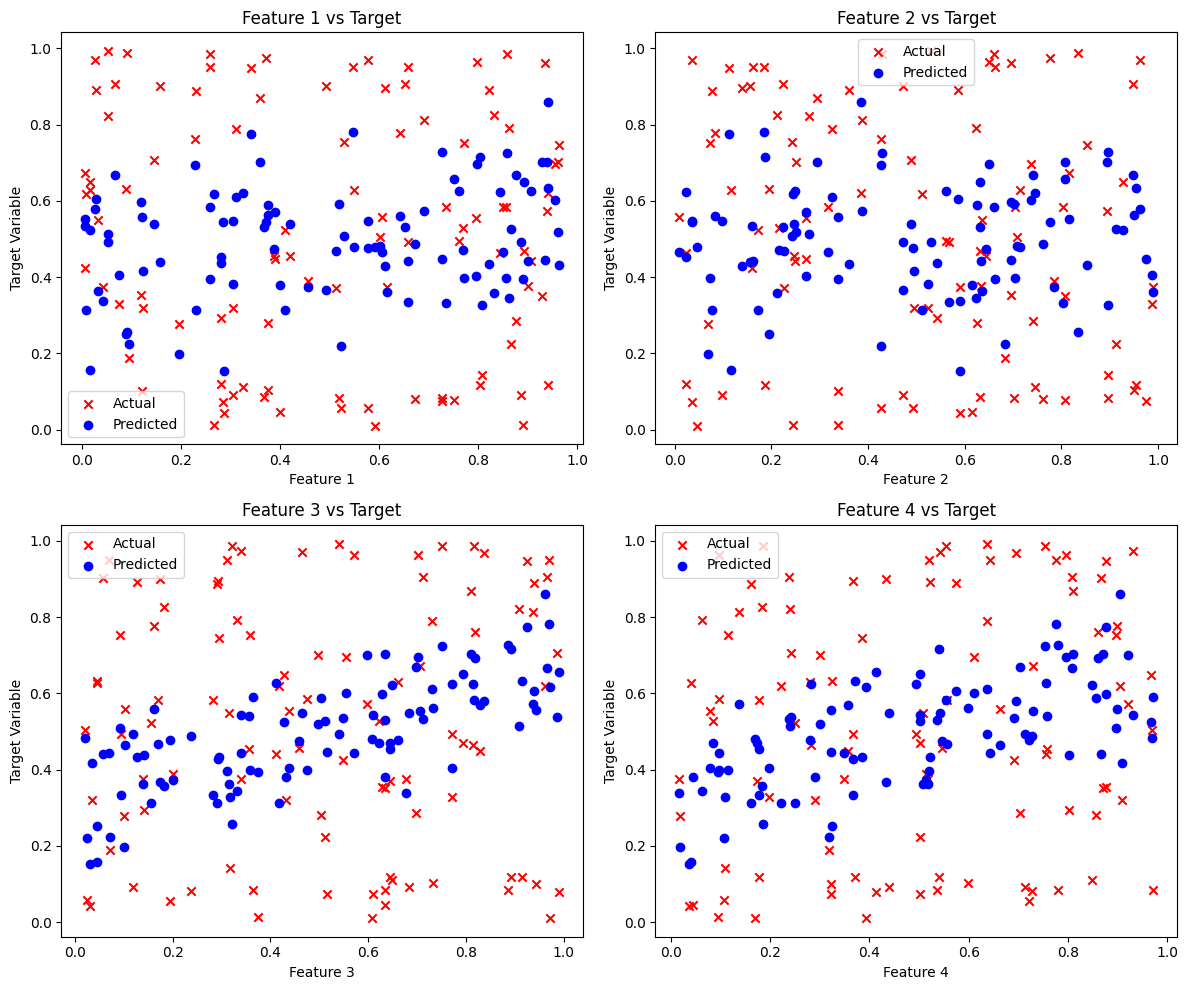

In [ ]:
import numpy as np

def compute_cost(X, y, w):
    """
    Compute the cost function for linear regression.
    """
    m = len(y)
    predictions = X.dot(w)  # Matrix multiplication
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

def gradient_descent(X, y, w, alpha, num_iters, print_every=1000):
    """
    Perform gradient descent to optimize w.
    """
    m = len(y)
    J_history = []

    for i in range(num_iters):
        gradient = (1 / m) * X.T.dot(X.dot(w) - y)  # Vectorized gradient computation
        w -= alpha * gradient
        J_history.append(compute_cost(X, y, w))

        # Print results at specified intervals
        if (i + 1) % print_every == 0:
            print(f"Iteration {i+1}: Cost = {J_history[-1]:.4f}, w = {w}")

    return w, J_history

np.set_printoptions(precision=3)

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random dataset with m=10 samples and n=4 features
m, n = 100, 4
X = np.random.rand(m, n)

# Add bias term (w_0) to X
X = np.c_[np.ones((m, 1)), X]  # Add bias column (Intercept)

# Generate random target values
y = np.random.rand(m)

# Initialize w randomly
w = np.random.rand(n + 1)

# Set hyperparameters
alpha = 0.0001  # Learning rate
num_iters = 50000  # Number of iterations

#print(f" X = {X} \n")
#print(f" y = {y} \n")
print(f" Initial w = {w} \n")

# Perform gradient descent
optimal_w, cost_history = gradient_descent(X, y, w, alpha, num_iters)

# Display final results
print("\nFinal w:", optimal_w)
print(f"Final Cost: {cost_history[-1]:.3f}")

# Prediction values
for i in range(m):
    y_pred[i] = w[0] + np.dot(w[1:], X[i, 1:])  # Apply dot product for multiple features

# Compute R² Score using Scikit-Learn
r2 = r2_score(y, y_pred)
print(f"R² Score (Scikit-Learn): {r2:.4f}")

# Create subplots for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
feature_names = [f"Feature {i+1}" for i in range(n)]

# Plot each feature against the target variable y (actual vs predicted)
for i, ax in enumerate(axes.flat):
    ax.scatter(X[:, i+1], y, marker='x', c='r', label='Actual')  # X[:, i+1] because first column is bias
    ax.scatter(X[:, i+1], y_pred, marker='o', c='b', label='Predicted')
    ax.set_title(f"{feature_names[i]} vs Target")
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel("Target Variable")
    ax.legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()

**w/ SKLEARN**

Optimal w: [ 0.54  -0.061 -0.189  0.026  0.178]
Final Cost: 0.048
R² Score (Scikit-Learn): 0.0508


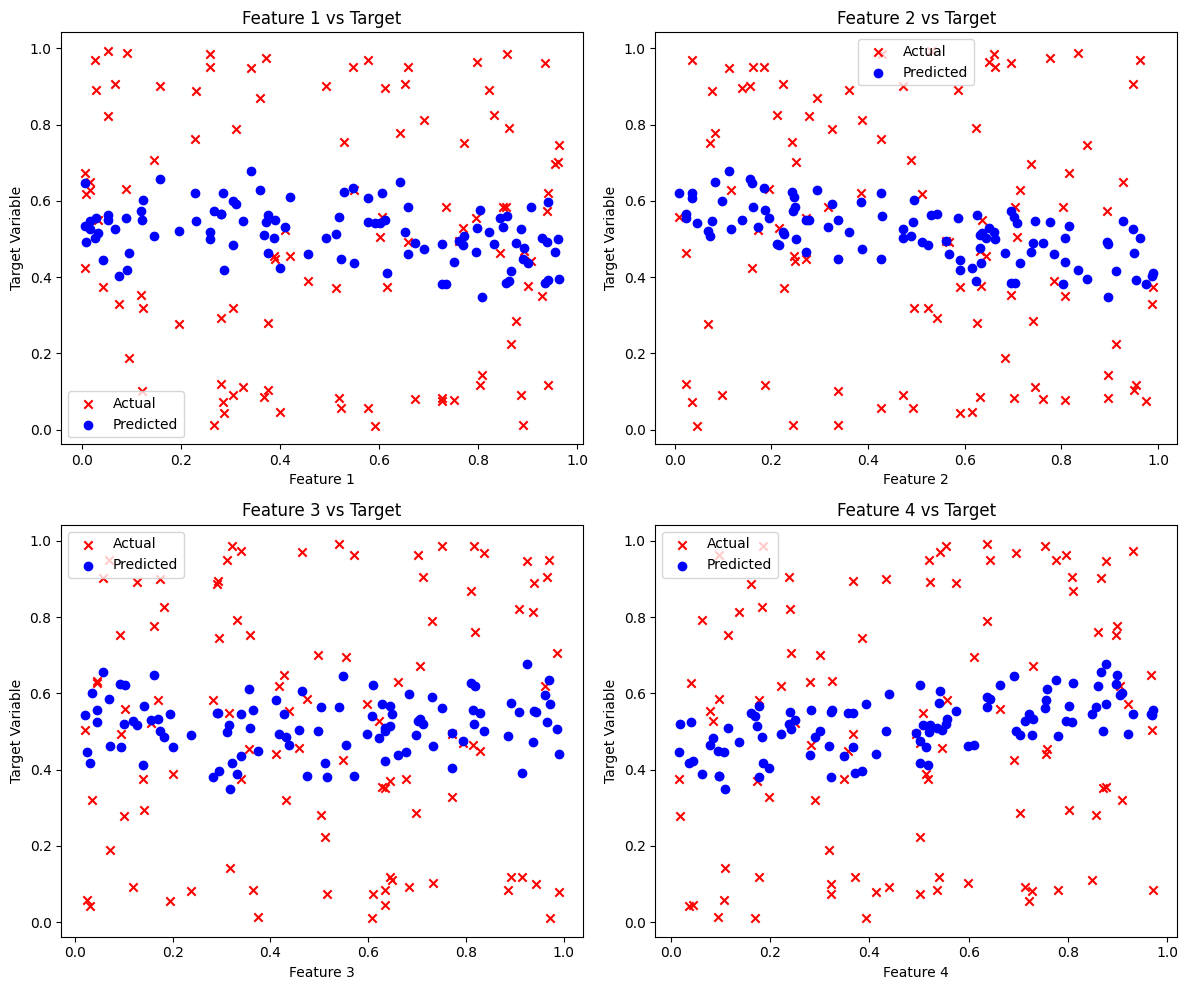

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random dataset with m=10 samples and n=4 features
m, n = 100, 4
X = np.random.rand(m, n)

# Add bias term (w_0) to X
X = np.c_[np.ones((m, 1)), X]

# Generate random target values
y = np.random.rand(m)

# Train the Linear Regression model
model = LinearRegression(fit_intercept=False)  # Bias term already included in X
model.fit(X, y)

# Get model parameters
w = model.coef_

# Make predictions
y_pred = model.predict(X)

# Compute cost function (Mean Squared Error)
cost = np.mean((y_pred - y) ** 2) / 2

# Display results
print("Optimal w:", w)
print(f"Final Cost: {cost:.3f}")

# Compute R² Score using Scikit-Learn
r2 = r2_score(y, y_pred)
print(f"R² Score (Scikit-Learn): {r2:.4f}")

# Create subplots for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
feature_names = [f"Feature {i+1}" for i in range(n)]

# Plot each feature against the target variable y (actual vs predicted)
for i, ax in enumerate(axes.flat):
    ax.scatter(X[:, i+1], y, marker='x', c='r', label='Actual')  # X[:, i+1] because first column is bias
    ax.scatter(X[:, i+1], y_pred, marker='o', c='b', label='Predicted')
    ax.set_title(f"{feature_names[i]} vs Target")
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel("Target Variable")
    ax.legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()

## Gradient Descent for Polynomial Regression

Consider $y= w_0 + w_1 x_1 + w_2 x_2^2$.

[-1.415 -0.421 -0.343]
Iteration 0: Cost = 3762.2209, w = [-1.406 -0.352  0.208]
Iteration 100: Cost = 27.9691, w = [-1.371 -0.247  0.991]
Iteration 200: Cost = 27.9177, w = [-1.35 -0.24  0.99]
Iteration 300: Cost = 27.8684, w = [-1.328 -0.233  0.989]
Iteration 400: Cost = 27.8211, w = [-1.307 -0.228  0.988]
Iteration 500: Cost = 27.7756, w = [-1.287 -0.223  0.987]
Iteration 600: Cost = 27.7316, w = [-1.266 -0.218  0.986]
Iteration 700: Cost = 27.6892, w = [-1.246 -0.214  0.985]
Iteration 800: Cost = 27.6482, w = [-1.226 -0.21   0.984]
Iteration 900: Cost = 27.6084, w = [-1.207 -0.207  0.983]
Iteration 1000: Cost = 27.5697, w = [-1.187 -0.204  0.983]
Iteration 1100: Cost = 27.5321, w = [-1.168 -0.202  0.982]
Iteration 1200: Cost = 27.4954, w = [-1.149 -0.2    0.982]
Iteration 1300: Cost = 27.4597, w = [-1.13  -0.199  0.981]
Iteration 1400: Cost = 27.4247, w = [-1.111 -0.197  0.981]
Iteration 1500: Cost = 27.3905, w = [-1.093 -0.197  0.98 ]
Iteration 1600: Cost = 27.3570, w = [-1.075 -0

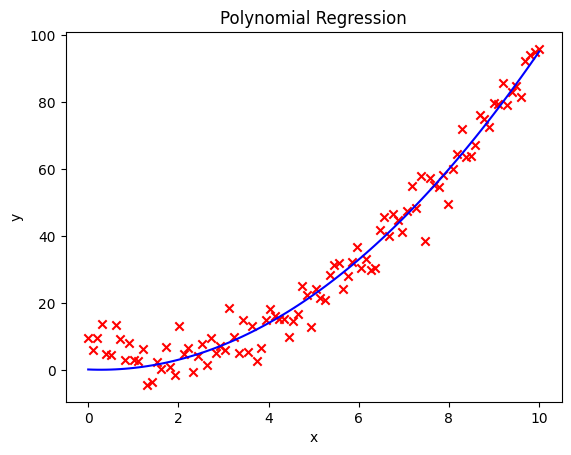

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 1.2 * x**2 - 3 * x + 7 + np.random.randn(100) * 5  # Polynomial relationship

# Transform input features for polynomial regression
X = np.c_[np.ones(x.shape[0]), x, x**2]  # Adding x^2 term

# Initialize parameters
w = np.random.randn(3)
print(w)

# Hyperparameters
learning_rate = 0.0001
iterations = 10000

# Gradient Descent
cost_history = []
w_history = []
np.set_printoptions(precision=3)
for i in range(iterations):
    y_pred = X.dot(w)
    error = y_pred - y
    cost = np.mean(error ** 2)  # Mean Squared Error
    cost_history.append(cost)
    w_history.append(w.copy())

    # Compute gradients
    gradients = (2 / len(x)) * X.T.dot(error)

    # Update parameters
    w -= learning_rate * gradients

    # Print status every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}, w = {w}")

# Final parameter values
print(f"Final Cost = {cost:.4f}, Final parameters: w = {w}")

# Generate predicted values
m = x.shape[0]
predicted_y = X.dot(w)
y_predd = np.zeros_like(x)

# Polynomial Regression Regression
for i in range(m):
    y_pred[i] = w[0] + w[1] * x[i] + w[2] * x[i]**2

# Compute R² Score using Scikit-Learn
r2 = r2_score(y, y_pred)
print(f"R² Score (Scikit-Learn): {r2:.4f}")

# Plot the polynomial fit
plt.plot(x, y_pred, c="b")
# Create a scatter plot of the data.
plt.scatter(x, y, marker='x', c='r')
# Set the title
plt.title("Polynomial Regression")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')
plt.show()


**w/ SKLEARN**

Final parameters: w = [-3.298  1.237], b = 6.740618241998938
Final Cost: 10.147
R² Score (Scikit-Learn): 0.9749


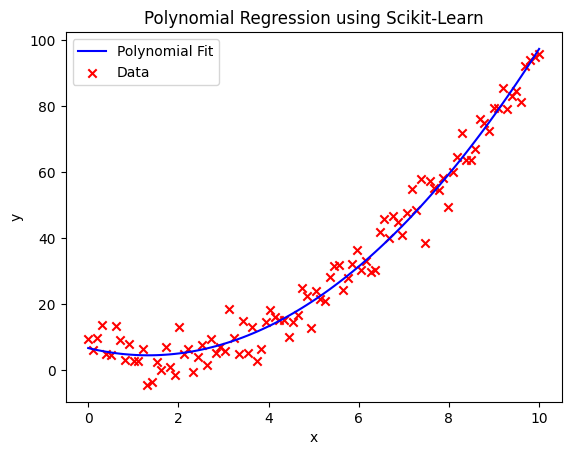

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
x = np.linspace(0, 10, 100).reshape(-1, 1)  # Reshape for sklearn
y = 1.2 * x**2 - 3 * x + 7 + np.random.randn(100, 1) * 5  # Polynomial relationship

# Transform input features for polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x)

# Train polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Get model parameters
w = model.coef_[0]
b = model.intercept_[0]

print(f"Final parameters: w = {w}, b = {b}")

# Generate predicted values
y_pred = model.predict(X_poly)

# Compute cost function (Mean Squared Error)
cost = np.mean((y_pred - y) ** 2) / 2
print(f"Final Cost: {cost:.3f}")

# Compute R² Score using Scikit-Learn
r2 = r2_score(y, y_pred)
print(f"R² Score (Scikit-Learn): {r2:.4f}")

# Plot the polynomial fit
plt.plot(x, y_pred, c="b", label="Polynomial Fit")
# Create a scatter plot of the data.
plt.scatter(x, y, marker='x', c='r', label="Data")
# Set the title
plt.title("Polynomial Regression using Scikit-Learn")
# Set the y-axis label
plt.ylabel('y')
# Set the x-axis label
plt.xlabel('x')
plt.legend()
plt.show()


## Feature Scaling

Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.

Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $

**z-score normalization:**
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} $$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$

#### Ex-1

[ 1.054 -1.378 -0.938]
Iteration 0: Cost = 6.7237, w = [ 1.054 -1.377 -0.938]
Iteration 1000: Cost = 4.6778, w = [ 1.018 -0.953 -0.787]
Iteration 2000: Cost = 3.3126, w = [ 0.965 -0.606 -0.675]
Iteration 3000: Cost = 2.3861, w = [ 0.904 -0.322 -0.586]
Iteration 4000: Cost = 1.7487, w = [ 0.839 -0.089 -0.514]
Iteration 5000: Cost = 1.3048, w = [ 0.775  0.101 -0.453]
Iteration 6000: Cost = 0.9916, w = [ 0.711  0.257 -0.399]
Iteration 7000: Cost = 0.7678, w = [ 0.65   0.385 -0.351]
Iteration 8000: Cost = 0.6053, w = [ 0.592  0.49  -0.308]
Iteration 9000: Cost = 0.4855, w = [ 0.537  0.575 -0.268]
Iteration 10000: Cost = 0.3955, w = [ 0.484  0.645 -0.231]
Iteration 11000: Cost = 0.3267, w = [ 0.435  0.703 -0.197]
Iteration 12000: Cost = 0.2731, w = [ 0.389  0.75  -0.166]
Iteration 13000: Cost = 0.2307, w = [ 0.346  0.788 -0.136]
Iteration 14000: Cost = 0.1965, w = [ 0.305  0.82  -0.108]
Iteration 15000: Cost = 0.1685, w = [ 0.267  0.845 -0.082]
Iteration 16000: Cost = 0.1453, w = [ 0.231  0

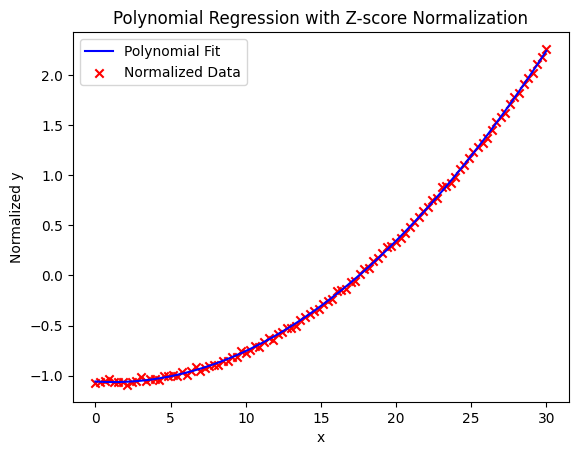

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
x = np.linspace(0, 30, 100)
y = 1.2 * x**2 - 3 * x + 7 + np.random.randn(100) * 5  # Polynomial relationship

# Feature Scaling (Z-score Normalization)
x_norm = (x - np.mean(x)) / np.std(x)
y_norm = (y - np.mean(y)) / np.std(y)  # Normalize y for stability

# Transform input features for polynomial regression
X = np.c_[np.ones(x.shape[0]), x_norm, x_norm**2]  # Adding x^2 term

# Initialize parameters
w = np.random.randn(3)
print(w)

# Hyperparameters
learning_rate = 0.0001
iterations = 100000

# Gradient Descent
cost_history = []
w_history = []
np.set_printoptions(precision=3)

for i in range(iterations):
    y_pred = X.dot(w)
    error = y_pred - y_norm  # Use normalized y

    cost = np.mean(error ** 2)  # Mean Squared Error
    cost_history.append(cost)
    w_history.append(w.copy())

    # Compute gradients
    gradients = (2 / len(x)) * X.T.dot(error)

    # Update parameters
    w -= learning_rate * gradients

    # Print status every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}, w = {w}")

# Final parameter values
print(f"Final Cost = {cost:.4f}, Final parameters: w = {w}")

# Generate predicted values
m = x.shape[0]
predicted_y = X.dot(w)
y_predd = np.zeros_like(x)

# Polynomial Regression Prediction
for i in range(m):
    y_predd[i] = w[0] + w[1] * x_norm[i] + w[2] * x_norm[i]**2

# Plot the polynomial fit
plt.plot(x, y_predd, c="b", label="Polynomial Fit")
# Create a scatter plot of the data
plt.scatter(x, y_norm, marker='x', c='r', label="Normalized Data")
# Set the title
plt.title("Polynomial Regression with Z-score Normalization")
# Set the y-axis label
plt.ylabel('Normalized y')
# Set the x-axis label
plt.xlabel('x')
plt.legend()
plt.show()


#### Ex-2

Read `housing_data.txt` from Google Drive. The data is read as:


size(sqft) | bedrooms | floors | age | price
3974	| 4	| 1	| 32 | 728.1 \\
1660	| 5	| 1	| 47 | 	361.3 \\
2094	| 1	| 3	| 75 | 	139.7 \\
1930	| 5	| 1	| 58 | 413.4 \\
1895	|5	| 2	| 85 | 	318.5 \\
...




In [15]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
%matplotlib inline

file_path = "/content/housing_data.txt"

# Load data
df = pd.read_csv(file_path, header=None, delimiter='\t')  # Explicitly set tab delimiter
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"X={X} and y={y} \n")

X=[[3974    4    1   32]
 [1660    5    1   47]
 [2094    1    3   75]
 [1930    5    1   58]
 [1895    5    2   85]
 [3892    1    2   21]
 [2438    1    2   29]
 [2969    1    3   37]
 [1266    1    1   50]
 [2038    4    1   53]
 [1130    3    1    7]
 [2282    3    3   26]
 [2935    1    2   26]
 [3971    3    2   97]
 [3719    3    1   20]
 [ 930    1    2   29]
 [2485    3    2   96]
 [1569    5    3   27]
 [3191    2    3   63]
 [2315    2    3   96]
 [3653    1    3   68]
 [3233    4    1   60]
 [2015    1    3   47]
 [1755    4    2   18]
 [3124    2    1    3]
 [1984    1    2   34]
 [1259    5    2   63]
 [ 821    3    2   48]
 [3100    4    3   16]
 [1547    3    3   43]
 [3704    3    1   91]
 [1274    1    1   29]
 [1882    3    3   92]
 [3358    5    2   45]
 [2847    3    1    5]
 [3547    1    3   98]
 [1775    5    3   36]
 [2606    2    3   23]
 [ 989    3    2   92]
 [3805    1    3   45]
 [3534    2    3   52]
 [3805    2    3   94]
 [1362    4    3   98]
 [2699   

Plot the scatter data.

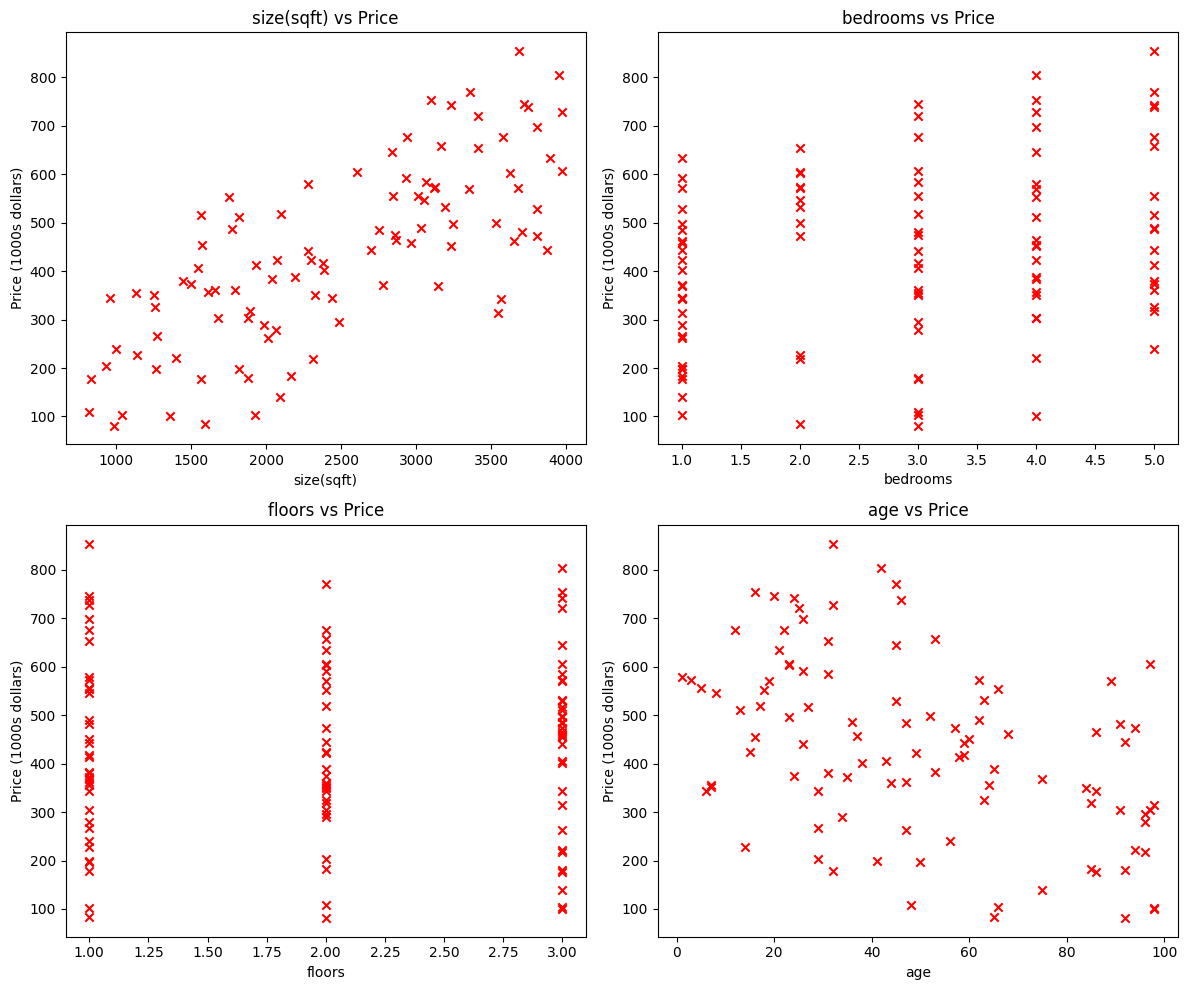

In [17]:
# %reset

X_original = X.copy()  # Store unnormalized features
y_original = y.copy()  # Store unnormalized target values

# Compute means and std deviations BEFORE normalization
X_mean = np.mean(X_original, axis=0)
X_std = np.std(X_original, axis=0)
y_mean = np.mean(y_original)
y_std = np.std(y_original)

# load the dataset
X_features = ['size(sqft)','bedrooms','floors','age']

# Create subplots for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each feature against target variable y (price)
for i, ax in enumerate(axes.flat):
    ax.scatter(X[:, i], y, marker='x', c='r', label=X_features[i])
    ax.set_title(f"{X_features[i]} vs Price")
    ax.set_xlabel(X_features[i])
    ax.set_ylabel("Price (1000s dollars)")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [ ]:
def compute_cost(X, y, w):
    """
    Compute the cost function for linear regression.
    """
    m = len(y)
    predictions = X.dot(w)  # Matrix multiplication
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost


def gradient_descent(X, y, w, alpha, num_iters, print_every=1000):
    """
    Perform gradient descent to optimize w.
    """
    m = len(y)
    J_history = []

    for i in range(num_iters):
        gradient = (1 / m) * X.T.dot(X.dot(w) - y)  # Vectorized gradient computation
        w -= alpha * gradient
        J_history.append(compute_cost(X, y, w))

        # Print results at specified intervals
        if (i + 1) % print_every == 0:
            print(f"Iteration {i+1}: Cost = {J_history[-1]:.4f}, w = {w}")

    return w, J_history

Use gradient descent

In [ ]:
# Initialize parameters
w = np.random.randn(4)
learning_rate = 0.0001
iterations = 100000

# Normalize features (Z-score normalization)
X_norm = (X_original - X_mean) / X_std
y_norm = (y_original - y_mean) / y_std  # Normalize y for stability

w_final, cost = gradient_descent(X_norm, y_norm, w, learning_rate, iterations, print_every=1000)

# Final parameter values
print(f"\n Final Cost = {cost[-1]:.4f}, Final parameters: w = {w_final}")

Iteration 1000: Cost = 7.4590, w = [-2.868 -0.93  -0.218 -1.165]
Iteration 2000: Cost = 6.1687, w = [-2.529 -0.841 -0.187 -1.092]
Iteration 3000: Cost = 5.1046, w = [-2.222 -0.757 -0.16  -1.026]
Iteration 4000: Cost = 4.2268, w = [-1.944 -0.678 -0.136 -0.967]
Iteration 5000: Cost = 3.5023, w = [-1.692 -0.603 -0.114 -0.914]
Iteration 6000: Cost = 2.9042, w = [-1.463 -0.534 -0.095 -0.867]
Iteration 7000: Cost = 2.4102, w = [-1.256 -0.468 -0.078 -0.824]
Iteration 8000: Cost = 2.0020, w = [-1.068 -0.407 -0.062 -0.787]
Iteration 9000: Cost = 1.6646, w = [-0.897 -0.35  -0.048 -0.753]
Iteration 10000: Cost = 1.3856, w = [-0.742 -0.297 -0.036 -0.723]
Iteration 11000: Cost = 1.1548, w = [-0.602 -0.247 -0.025 -0.696]
Iteration 12000: Cost = 0.9639, w = [-0.474 -0.2   -0.015 -0.672]
Iteration 13000: Cost = 0.8059, w = [-0.359 -0.157 -0.005 -0.65 ]
Iteration 14000: Cost = 0.6751, w = [-0.254 -0.117  0.003 -0.631]
Iteration 15000: Cost = 0.5667, w = [-0.159 -0.079  0.011 -0.614]
Iteration 16000: Co

Calculate the predicted data and plot the unnormalized original data and the predicted data.


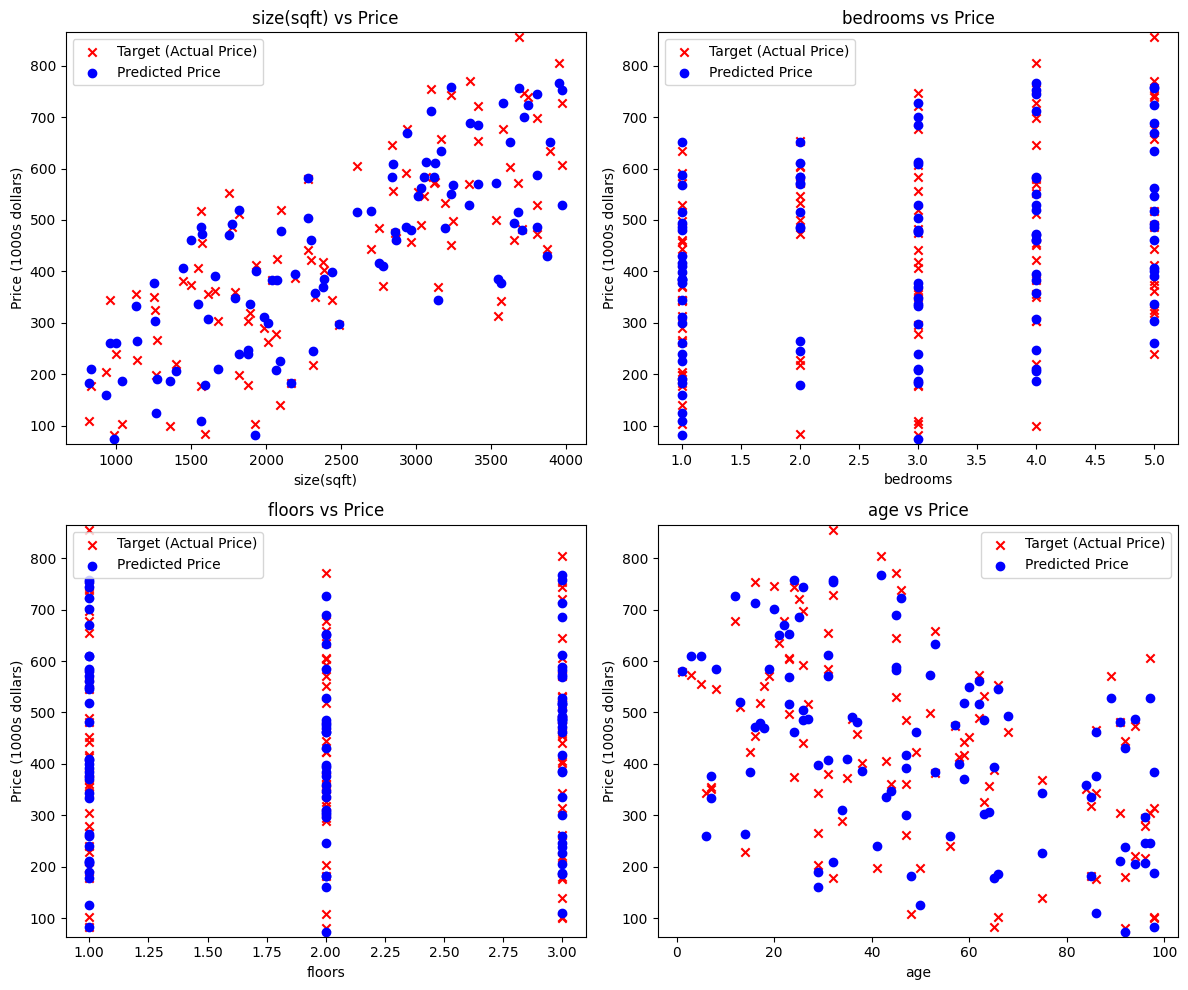

In [ ]:
# Predict target using normalized features
m = X_norm.shape[0]
ypred = np.zeros(m)

# Vectorized computation of predictions
# yp = X_norm @ w_final  # Matrix multiplication for all samples at once
ypred = np.dot(X_norm, w_final)

# Denormalize predictions (convert back to original scale)
X_denorm = (X_norm * X_std) + X_mean  # Convert features back to original scale
yp_denorm = ypred * y_std + y_mean  # Convert predicted y back to real values

# Create subplots for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot each feature against target variable y (price)
for i, ax in enumerate(axes.flat):
    ax.scatter(X_denorm[:, i], y_original, marker='x', c='r', label='Target (Actual Price)')
    ax.scatter(X_denorm[:, i], yp_denorm, marker='o', c='b', label='Predicted Price')
    ax.set_title(f"{X_features[i]} vs Price")
    ax.set_xlabel(X_features[i])
    ax.set_ylabel("Price (1000s dollars)")
    ax.legend()

    # Ensure y-axis is properly scaled
    min_y = min(y_original.min(), yp_denorm.min())
    max_y = max(y_original.max(), yp_denorm.max())
    ax.set_ylim([min_y - 10, max_y + 10])  # Properly scale y-axis

# Adjust layout
plt.tight_layout()
plt.show()


**w/ SKLEARN**

Optimal weights: [143.92247696  71.11081493  20.16219676 -87.52230326]
Intercept: 435.098
Final Cost: 1309.817


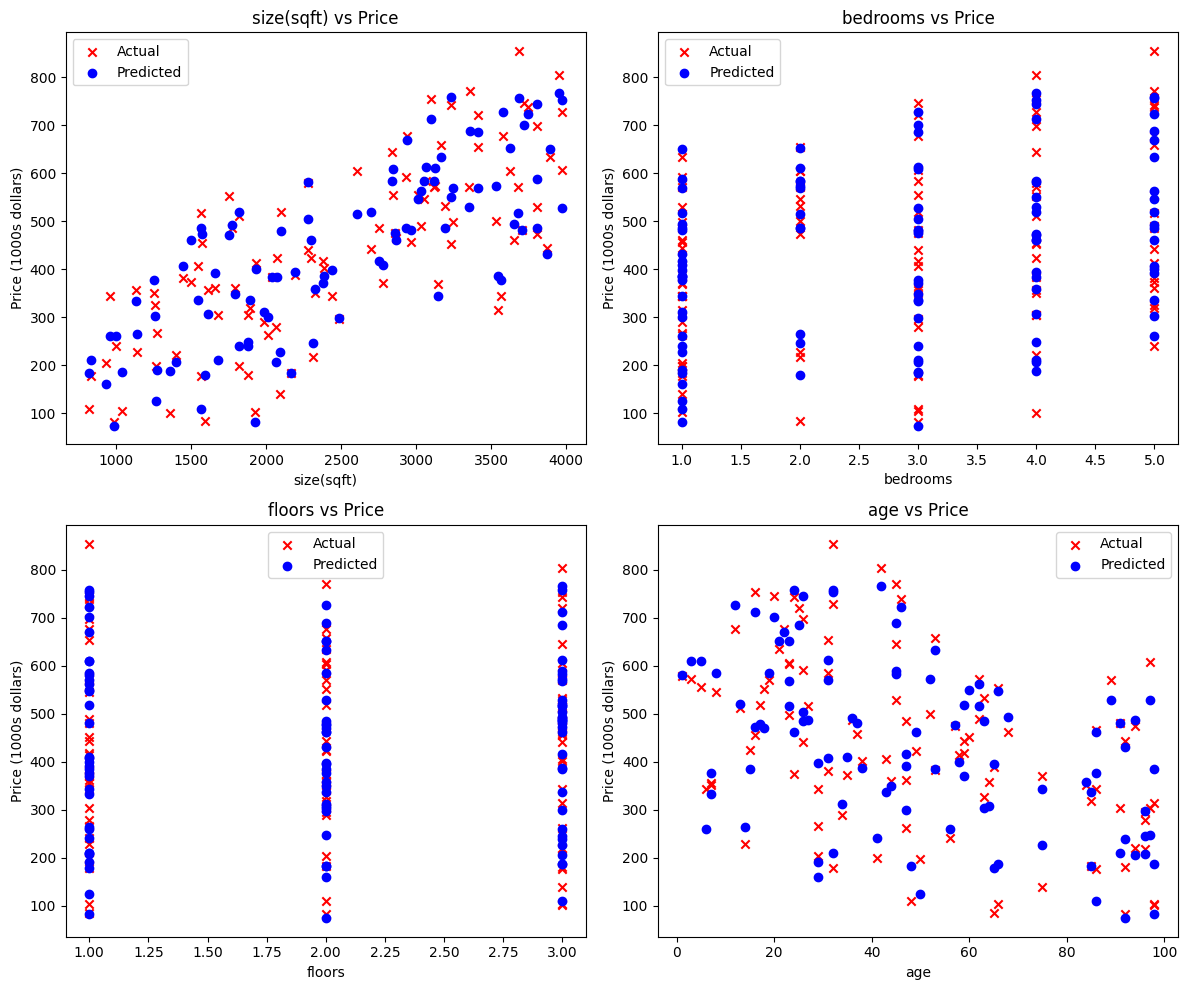

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd


file_path = "/content/housing_data.txt"

# Load data
df = pd.read_csv(file_path, header=None, delimiter='\t')  # Explicitly set tab delimiter
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_original = X.copy()  # Store unnormalized features
y_original = y.copy()  # Store unnormalized target values

# Normalize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Train linear regression model
model = LinearRegression()
model.fit(X_scaled, y_original)

# Make predictions
y_pred = model.predict(X_scaled)

# Compute cost function (Mean Squared Error)
cost = np.mean((y_pred - y) ** 2) / 2

# Get model parameters
w = model.coef_
b = model.intercept_

print(f"Optimal weights: {w}")
print(f"Intercept: {b:.3f}")
print(f"Final Cost: {cost:.3f}")

# Create subplots for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
X_features = ['size(sqft)','bedrooms','floors','age']

# Plot each feature against target variable y (price)
for i, ax in enumerate(axes.flat):
    ax.scatter(X_original[:, i], y_original, marker='x', c='r', label='Actual')
    ax.scatter(X_original[:, i], y_pred, marker='o', c='b', label='Predicted')
    ax.set_title(f"{X_features[i]} vs Price")
    ax.set_xlabel(X_features[i])
    ax.set_ylabel("Price (1000s dollars)")
    ax.legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()


**w/o SKLEARN**

Iteration 1000: Cost = 0.8344, w = [ 1.04857394  1.36512635  0.38687258 -1.30446827]
Iteration 2000: Cost = 0.7004, w = [ 1.03204571  1.27910506  0.38239297 -1.22901708]
Iteration 3000: Cost = 0.5898, w = [ 1.016269    1.20102573  0.37636906 -1.16065725]
Iteration 4000: Cost = 0.4983, w = [ 1.00125568  1.13011803  0.36913346 -1.0987031 ]
Iteration 5000: Cost = 0.4225, w = [ 0.9870077   1.06568996  0.36096886 -1.04253706]
Iteration 6000: Cost = 0.3596, w = [ 0.97351901  1.00711949  0.35211465 -0.99160272]
Iteration 7000: Cost = 0.3073, w = [ 0.96077716  0.95384722  0.3427727  -0.94539863]
Iteration 8000: Cost = 0.2638, w = [ 0.94876467  0.90536982  0.33311244 -0.90347275]
Iteration 9000: Cost = 0.2276, w = [ 0.93746014  0.86123412  0.3232753  -0.86541741]
Iteration 10000: Cost = 0.1974, w = [ 0.92683927  0.82103194  0.31337854 -0.8308649 ]
Iteration 11000: Cost = 0.1721, w = [ 0.91687563  0.78439541  0.30351866 -0.79948341]
Iteration 12000: Cost = 0.1510, w = [ 0.90754134  0.75099276  0

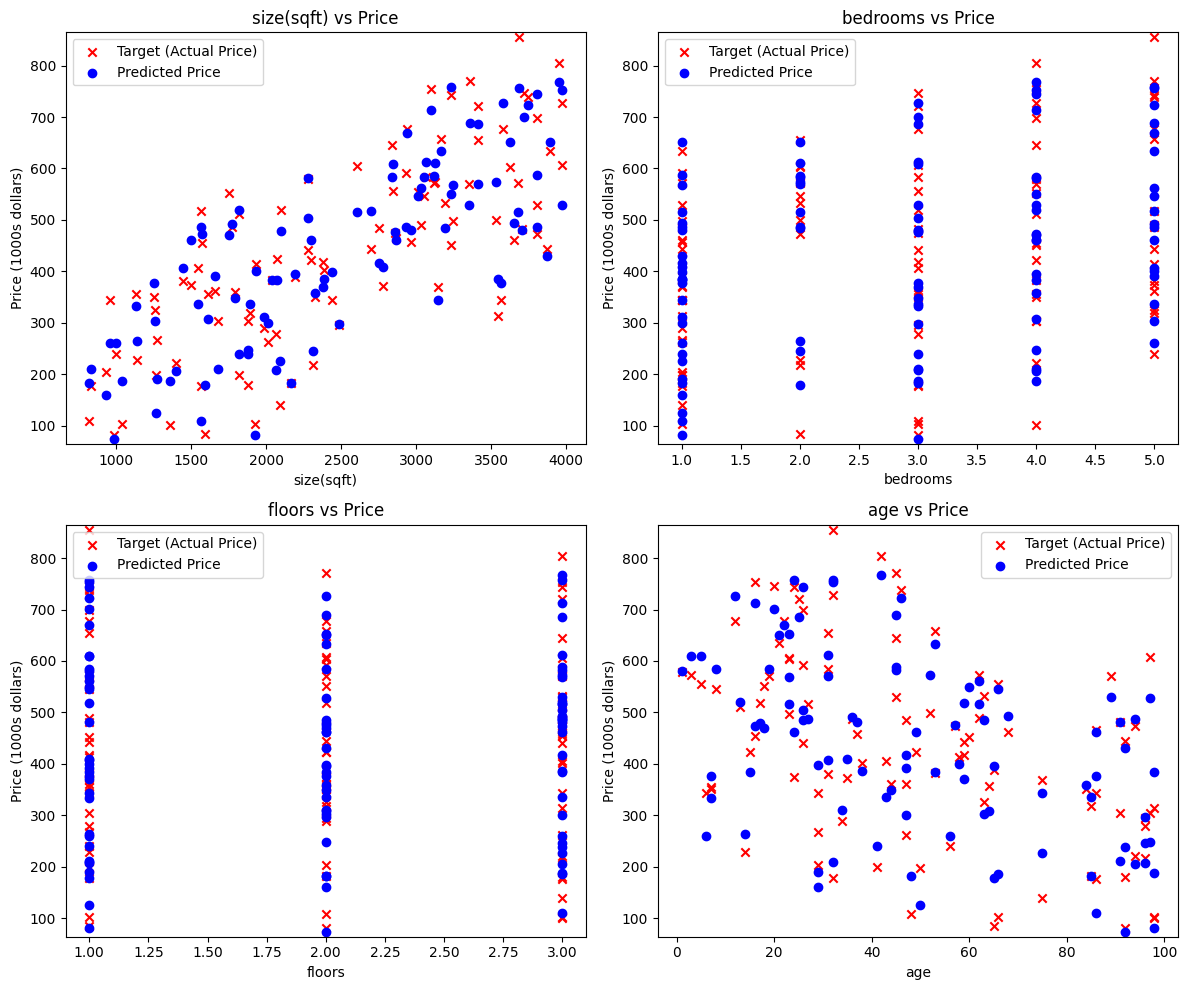

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

file_path = "/content/housing_data.txt"

# Load data
df = pd.read_csv(file_path, header=None, delimiter='\t')  # Explicitly set tab delimiter
X_original = df.iloc[:, :-1].values
y_original = df.iloc[:, -1].values

# Compute means and std deviations BEFORE normalization
X_mean = np.mean(X_original, axis=0)
X_std = np.std(X_original, axis=0)
y_mean = np.mean(y_original)
y_std = np.std(y_original)

# Normalize features (Z-score normalization)
X_norm = (X_original - X_mean) / X_std
y_norm = (y_original - y_mean) / y_std  # Normalize y for stability

# Initialize parameters
w = np.random.randn(X_norm.shape[1])
learning_rate = 0.0001
iterations = 100000

# Perform gradient descent
def compute_cost(X, y, w):
    m = len(y)
    predictions = X.dot(w)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

def gradient_descent(X, y, w, alpha, num_iters, print_every=1000):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        gradient = (1 / m) * X.T.dot(X.dot(w) - y)
        w -= alpha * gradient
        J_history.append(compute_cost(X, y, w))
        if (i + 1) % print_every == 0:
            print(f"Iteration {i+1}: Cost = {J_history[-1]:.4f}, w = {w}")
    return w, J_history

w_final, cost = gradient_descent(X_norm, y_norm, w, learning_rate, iterations, print_every=1000)

print(f"\nFinal Cost = {cost[-1]:.4f}, Final parameters: w = {w_final}")

# Denormalize cost
cost_original = cost[-1] * (y_std ** 2)

# Unnormalize weights
w_original = (w_final / X_std) * y_std

# Unnormalize bias (b)
b_original = y_mean - np.sum(w_original * X_mean)

print("Unnormalized Weights:", w_original)
print("Unnormalized Bias:", b_original)

print(f"Normalized Cost: {cost[-1]:.4f}")
print(f"Denormalized Cost: {cost_original:.4f}")  # Now in actual price units

# Predict target using normalized features
temp_ypred = np.dot(X_norm, w_final)

# Denormalize predictions
yp_denorm = (temp_ypred * y_std) + y_mean  # Convert predicted y back to real scale
X_denorm = (X_norm * X_std) + X_mean  # Convert features back to original scale

# Create subplots for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

for i, ax in enumerate(axes.flat):
    ax.scatter(X_denorm[:, i], y_original, marker='x', c='r', label='Target (Actual Price)')
    ax.scatter(X_denorm[:, i], yp_denorm, marker='o', c='b', label='Predicted Price')
    ax.set_title(f"{X_features[i]} vs Price")
    ax.set_xlabel(X_features[i])
    ax.set_ylabel("Price (1000s dollars)")
    ax.legend()

    # Ensure y-axis is properly scaled
    min_y = min(y_original.min(), yp_denorm.min())
    max_y = max(y_original.max(), yp_denorm.max())
    ax.set_ylim([min_y - 10, max_y + 10])

plt.tight_layout()
plt.show()

## Regularization

Iteration 1000: Cost = 2.2108, w = [-0.57565955 -0.48383632  1.21615056  0.16105668]
Iteration 2000: Cost = 1.8051, w = [-0.45856814 -0.39546551  1.09669376  0.0922017 ]
Iteration 3000: Cost = 1.4760, w = [-0.35132458 -0.31634313  0.99015882  0.03081399]
Iteration 4000: Cost = 1.2089, w = [-0.25312928 -0.24547431  0.89514196 -0.02391999]
Iteration 5000: Cost = 0.9920, w = [-0.16324389 -0.18197364  0.81039279 -0.07272482]
Iteration 6000: Cost = 0.8157, w = [-0.08098709 -0.12505286  0.73479744 -0.11624587]
Iteration 7000: Cost = 0.6723, w = [-0.00573056 -0.07401009  0.66736358 -0.15505797]
Iteration 8000: Cost = 0.5557, w = [ 0.06310469 -0.02822011  0.60720702 -0.18967315]
Iteration 9000: Cost = 0.4608, w = [ 0.12605192  0.01287412  0.55353987 -0.22054758]
Iteration 10000: Cost = 0.3835, w = [ 0.18360198  0.04976906  0.50566003 -0.24808761]
Iteration 11000: Cost = 0.3205, w = [ 0.23620643  0.08290732  0.4629417  -0.27265526]
Iteration 12000: Cost = 0.2691, w = [ 0.28428048  0.11268363  0

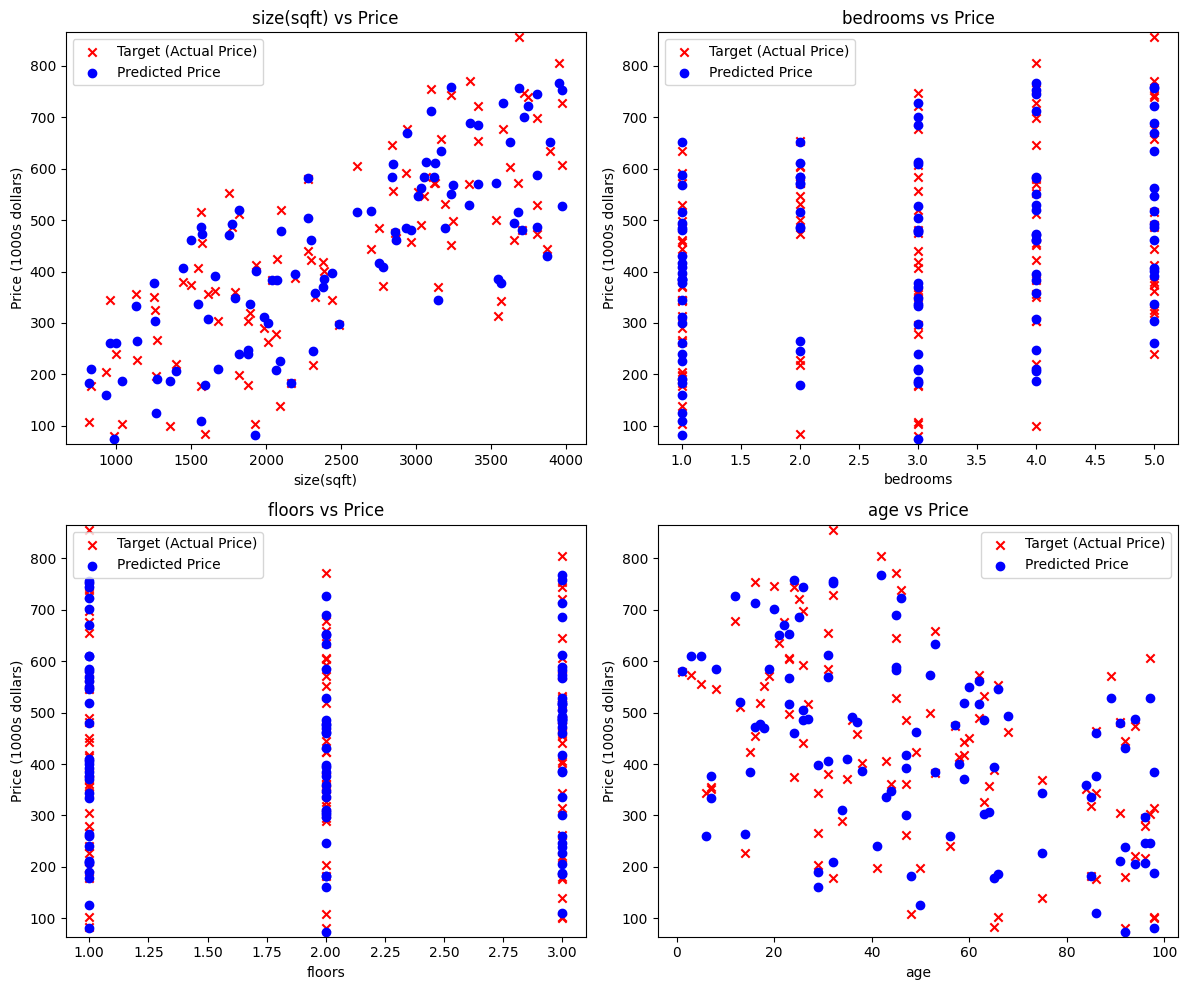

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

file_path = "/content/housing_data.txt"

# Load data
df = pd.read_csv(file_path, header=None, delimiter='\t')  # Explicitly set tab delimiter
X_original = df.iloc[:, :-1].values
y_original = df.iloc[:, -1].values

# Compute means and std deviations BEFORE normalization
X_mean = np.mean(X_original, axis=0)
X_std = np.std(X_original, axis=0)
y_mean = np.mean(y_original)
y_std = np.std(y_original)

# Normalize features (Z-score normalization)
X_norm = (X_original - X_mean) / X_std
y_norm = (y_original - y_mean) / y_std  # Normalize y for stability

# Initialize parameters
w = np.random.randn(X_norm.shape[1])
learning_rate = 0.0001
iterations = 100000
lambda_ = 0.1  # Regularization strength (can be tuned)

# --- ✅ Compute Cost with Regularization ---
def compute_cost_reg(X, y, w, lambda_):
    """
    Compute the cost function with L2 regularization.
    """
    m = len(y)
    predictions = X.dot(w)
    errors = predictions - y
    regularization_term = (lambda_ / (2 * m)) * np.sum(w ** 2)  # L2 penalty
    cost = (1 / (2 * m)) * np.sum(errors ** 2) + regularization_term
    return cost

# --- ✅ Gradient Descent with Regularization ---
def gradient_descent_reg(X, y, w, alpha, num_iters, lambda_, print_every=1000):
    """
    Performs batch gradient descent with L2 regularization.
    """
    m = len(y)
    J_history = []

    for i in range(num_iters):
        gradient = (1 / m) * X.T.dot(X.dot(w) - y) + (lambda_ / m) * w  # Add regularization term
        w -= alpha * gradient
        J_history.append(compute_cost_reg(X, y, w, lambda_))

        if (i + 1) % print_every == 0:
            print(f"Iteration {i+1}: Cost = {J_history[-1]:.4f}, w = {w}")

    return w, J_history

# Run gradient descent with regularization
w_final, cost = gradient_descent_reg(X_norm, y_norm, w, learning_rate, iterations, lambda_, print_every=1000)

print(f"\nFinal Cost = {cost[-1]:.4f}, Final parameters: w = {w_final}")

# Denormalize cost
cost_original = cost[-1] * (y_std ** 2)

# Unnormalize weights
w_original = (w_final / X_std) * y_std

# Unnormalize bias (b)
b_original = y_mean - np.sum(w_original * X_mean)

print("Unnormalized Weights:", w_original)
print("Unnormalized Bias:", b_original)

print(f"Normalized Cost: {cost[-1]:.4f}")
print(f"Denormalized Cost: {cost_original:.4f}")  # Now in actual price units

# --- ✅ Predict and Plot ---
temp_ypred = np.dot(X_norm, w_final)

# Denormalize predictions
yp_denorm = (temp_ypred * y_std) + y_mean  # Convert predicted y back to real scale
X_denorm = (X_norm * X_std) + X_mean  # Convert features back to original scale

# Create subplots for scatter plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

for i, ax in enumerate(axes.flat):
    ax.scatter(X_denorm[:, i], y_original, marker='x', c='r', label='Target (Actual Price)')
    ax.scatter(X_denorm[:, i], yp_denorm, marker='o', c='b', label='Predicted Price')
    ax.set_title(f"{X_features[i]} vs Price")
    ax.set_xlabel(X_features[i])
    ax.set_ylabel("Price (1000s dollars)")
    ax.legend()

    # Ensure y-axis is properly scaled
    min_y = min(y_original.min(), yp_denorm.min())
    max_y = max(y_original.max(), yp_denorm.max())
    ax.set_ylim([min_y - 10, max_y + 10])

plt.tight_layout()
plt.show()



🚀 **Comparison of Regularized vs. Unregularized Models**
Unregularized Linear Regression - Train MSE: 0.009995, Test MSE: 0.011353
Regularized Ridge Regression  - Train MSE: 0.030576, Test MSE: 0.025298


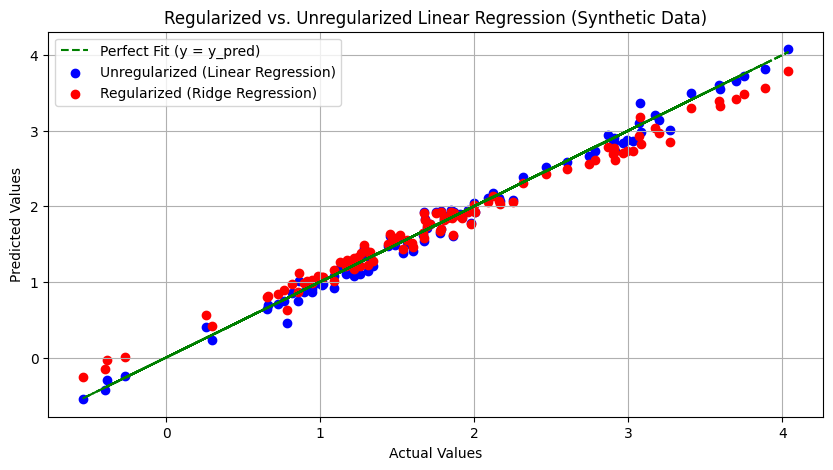

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# --- ✅ Generate Synthetic Data Using np.random.rand() ---
np.random.seed(42)  # For reproducibility

num_samples = 500  # Number of data points
X_synthetic = np.random.rand(num_samples, 3)  # 3 Features: [Feature 1, Feature 2, Feature 3]
y_synthetic = (3 * X_synthetic[:, 0] +
               2 * X_synthetic[:, 1] -
               1.5 * X_synthetic[:, 2] +
               np.random.randn(num_samples) * 0.1)  # Linear function with noise

# --- ✅ Split Data into Training & Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

# --- ✅ Unregularized Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Train the model
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Compute Mean Squared Error (MSE)
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)

# --- ✅ Regularized Linear Regression (Ridge) ---
ridge_model = Ridge(alpha=5)  # Regularization strength (adjustable)
ridge_model.fit(X_train, y_train)  # Train the model
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Compute Mean Squared Error (MSE)
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# --- ✅ Compare Results ---
print("\n🚀 **Comparison of Regularized vs. Unregularized Models**")
print(f"Unregularized Linear Regression - Train MSE: {train_mse_lr:.6f}, Test MSE: {test_mse_lr:.6f}")
print(f"Regularized Ridge Regression  - Train MSE: {train_mse_ridge:.6f}, Test MSE: {test_mse_ridge:.6f}")

# --- ✅ Plot Predictions ---
plt.figure(figsize=(10, 5))
plt.plot(y_test, y_test, 'g--', label="Perfect Fit (y = y_pred)")  # Reference line
plt.scatter(y_test, y_test_pred_lr, color='blue', label="Unregularized (Linear Regression)")
plt.scatter(y_test, y_test_pred_ridge, color='red', label="Regularized (Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regularized vs. Unregularized Linear Regression (Synthetic Data)")
plt.legend()
plt.grid(True)
plt.show()

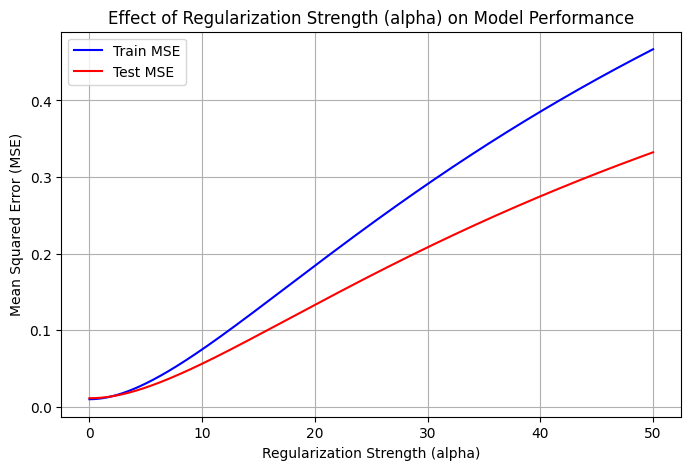

In [44]:
# Impact of alpha

"""
✔ Small alpha (~0) → Model behaves like ordinary linear regression.
✔ Optimal alpha (~0.1 - 1) → Balances training and test error (best generalization).
✔ Large alpha (>>10) → Underfitting; model becomes too simple and ignores key feature
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Different alpha values
alpha_values = np.linspace(0, 50, 1000, endpoint=True)
train_errors = []
test_errors = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)  # Train model

    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot the effect of alpha on error
plt.figure(figsize=(8, 5))
plt.plot(alpha_values, train_errors, label="Train MSE", color='blue')
plt.plot(alpha_values, test_errors, label="Test MSE", color='red')
# plt.xscale("log")  # Use log scale for better visualization
plt.xlabel("Regularization Strength (alpha)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Effect of Regularization Strength (alpha) on Model Performance")
plt.legend()
plt.grid(True)
plt.show()